In [1]:
import pandas as pd
trackers=pd.read_csv('data1.csv')
trackers.head()

,gyroX,gyroY,gyroZ,lowAccelX,lowAccelY,lowAccelZ,highAccelX,highAccelY,highAccelZ,exercise
0,617.0,342.0,-1120.0,1338.0,2865.0,2215.0,-267.0,686.0,621.0,(jab_)cross_shadowboxing_medium_20_T7R_1531551...
1,477.0,-49.0,-1214.0,1516.0,3041.0,2332.0,-249.0,704.0,633.0,(jab_)cross_shadowboxing_medium_20_T7R_1531551...
2,228.0,-596.0,-1256.0,1602.0,3406.0,1796.0,-240.0,740.0,579.0,(jab_)cross_shadowboxing_medium_20_T7R_1531551...
3,24.0,-1098.0,-1276.0,1264.0,3484.0,1194.0,-274.0,748.0,519.0,(jab_)cross_shadowboxing_medium_20_T7R_1531551...
4,-164.0,-1552.0,-1236.0,1016.0,3876.0,576.0,-299.0,787.0,457.0,(jab_)cross_shadowboxing_medium_20_T7R_1531551...


https://maxpowerwastaken.github.io/blog/pandas_view_vs_copy/

To avoid a warning when creating a new column in the waterbag_hard dataframe (which is a slice of the general dataframe), instead of:

waterbag_hard=trackers[trackers.exercise.str.contains('waterbag_hard_20_T7R_1531551')]

Use:

In [2]:
waterbag_hard_indices = trackers[trackers.exercise.str.contains('waterbag_hard_20_T7R_1531551')].index
waterbag_hard_indices
waterbag_hard=trackers.loc[waterbag_hard_indices, :]
waterbag_hard=waterbag_hard.drop('exercise',axis=1)
waterbag_hard.head()

,gyroX,gyroY,gyroZ,lowAccelX,lowAccelY,lowAccelZ,highAccelX,highAccelY,highAccelZ
2912,4.0,-56.0,-16.0,540.0,1816.0,1030.0,-346.0,581.0,503.0
2913,0.0,-72.0,-27.0,534.0,1814.0,1023.0,-347.0,581.0,502.0
2914,0.0,-87.0,-37.0,523.0,1803.0,1027.0,-348.0,580.0,502.0
2915,0.0,-97.0,-40.0,534.0,1793.0,1030.0,-347.0,579.0,503.0
2916,7.0,-107.0,-40.0,547.0,1776.0,1038.0,-346.0,577.0,503.0


In [3]:
waterbag_hard.shape

(3531, 9)

### One series= one classification unit

In [4]:
#Count repetitions: find the max of each row and identify which feature consistently shows the highest max.
waterbag_hard['max_value']=waterbag_hard.max(axis=1)
waterbag_hard.head()

,gyroX,gyroY,gyroZ,lowAccelX,lowAccelY,lowAccelZ,highAccelX,highAccelY,highAccelZ,max_value
2912,4.0,-56.0,-16.0,540.0,1816.0,1030.0,-346.0,581.0,503.0,1816.0
2913,0.0,-72.0,-27.0,534.0,1814.0,1023.0,-347.0,581.0,502.0,1814.0
2914,0.0,-87.0,-37.0,523.0,1803.0,1027.0,-348.0,580.0,502.0,1803.0
2915,0.0,-97.0,-40.0,534.0,1793.0,1030.0,-347.0,579.0,503.0,1793.0
2916,7.0,-107.0,-40.0,547.0,1776.0,1038.0,-346.0,577.0,503.0,1776.0


In [5]:
maximums=waterbag_hard.max_value.sort_values(ascending=False)[0:20]
maximums.sort_index(inplace=True)
maximums

3266    32730.0
3417    32730.0
3564    32730.0
3705    32730.0
3706    32730.0
3851    32730.0
4000    32730.0
4148    32730.0
4298    32730.0
4447    32730.0
4448    32730.0
4588    32730.0
4731    32730.0
4873    32730.0
5166    32722.0
5304    32730.0
5447    32730.0
5581    32730.0
5712    32730.0
5856    32730.0
Name: max_value, dtype: float64

In [6]:
margin=int((maximums.index[19]-maximums.index[0])/19/2)
margin

68

In [7]:
import glob
list_files=glob.glob('./recordings+7.14+Luc/*.txt')
list_names=[s.strip('recordings+7.14+Luc/\\.txt').replace('-','_') for s in list_files]
list_names[0:10]

['(jab_)cross_shadowboxing_medium_20_T7R_15315512423',
 '(jab_)cross_shadowboxing_slow_20_T7R_1531551153638',
 '(jab_)cross_waterbag_hard_20_T7R_1531551996366',
 '(jab_)cross_waterbag_light_20_T7R_153155187793',
 '(jab_)cross_waterbag_mediumpower_20_T7R_1531551924743',
 'biceps_curls_10_T7L_1531913275450',
 'biceps_curls_10_T7L_1531913463782',
 'biceps_curls_10_T7L_153191370645',
 'biceps_curls_10_T7R_1531913275450',
 'biceps_curls_10_T7R_1531913463782']

In [8]:
#Basic visualization
def pre_visualize(data,title):
    import matplotlib.pyplot as plt
    %matplotlib inline
    data.plot(figsize=(12, 6))
    plt.xlabel('time'), plt.ylabel('acceleration'),plt.title(title)
    plt.show()

In [76]:
import itertools
#waterbag_hard=waterbag_hard.drop('max_value',axis=1)
col_names_as_lists=[list(waterbag_hard.columns+str(n)) for n in range(0,margin*2+1)]
col_names = list(itertools.chain(*col_names_as_lists))
flat_waterbag_hard = pd.DataFrame(columns=col_names)

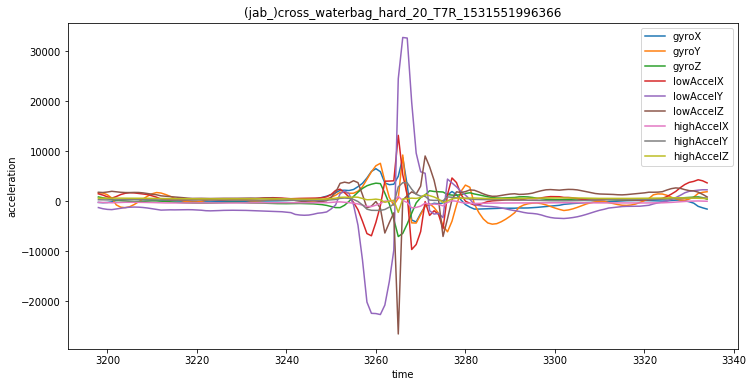

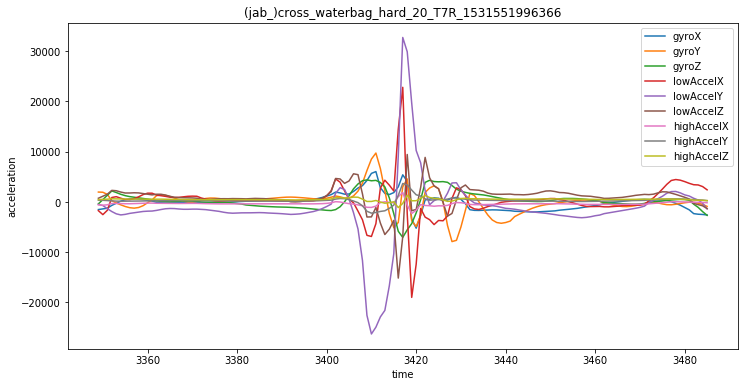

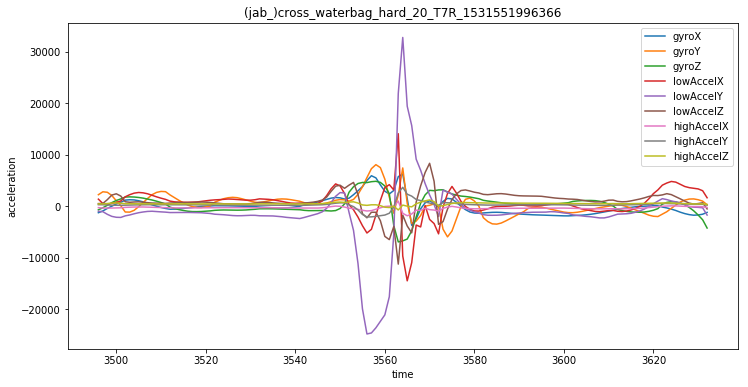

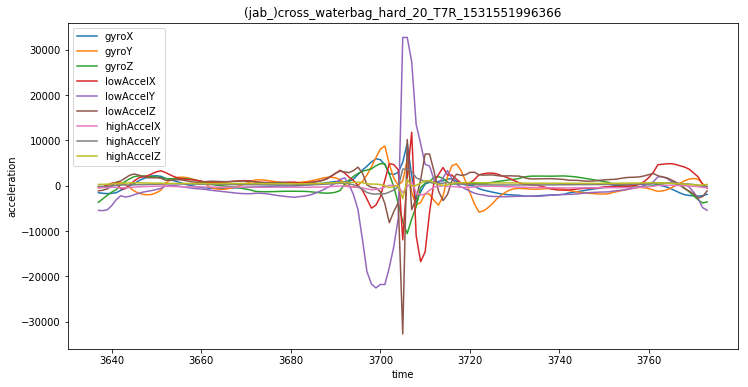

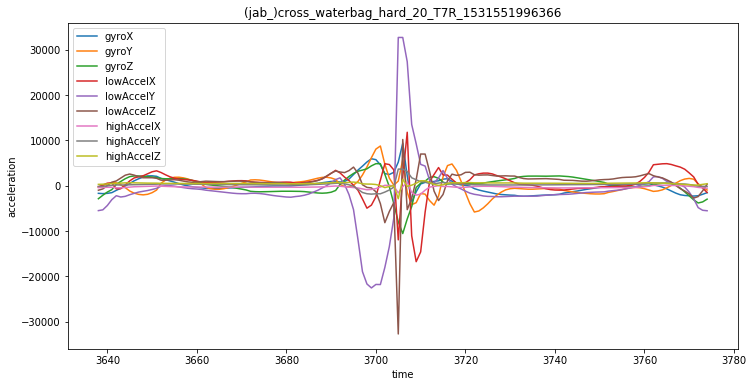

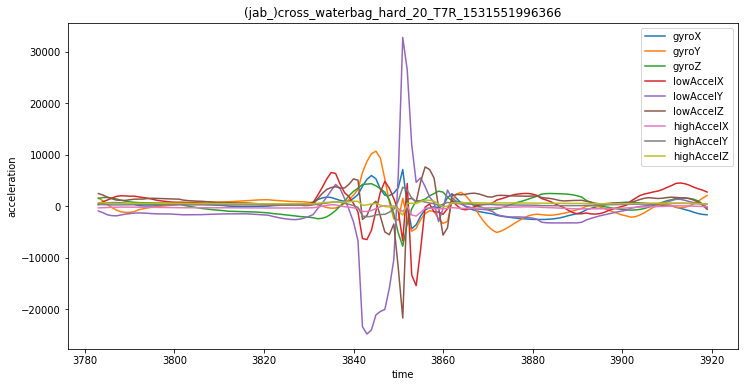

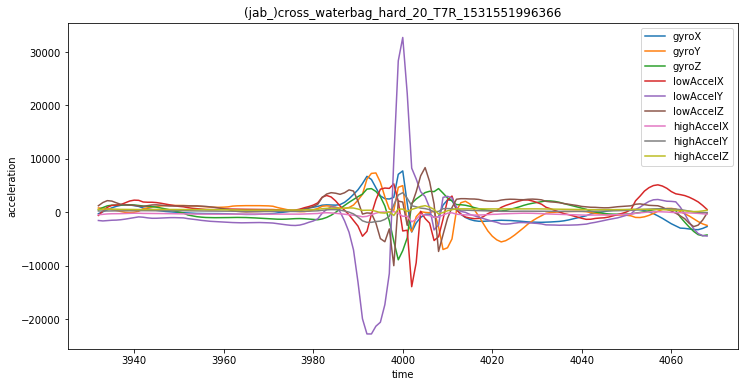

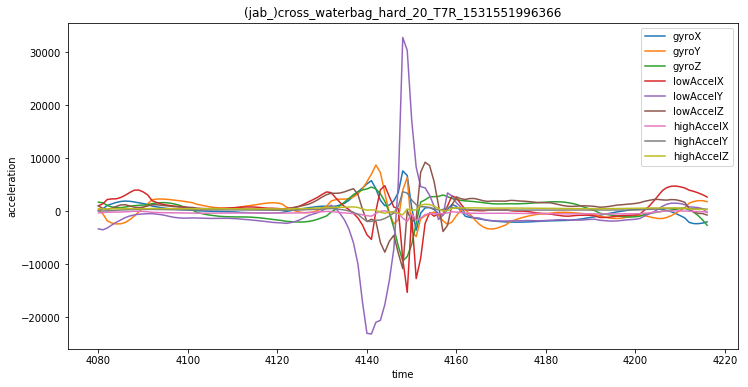

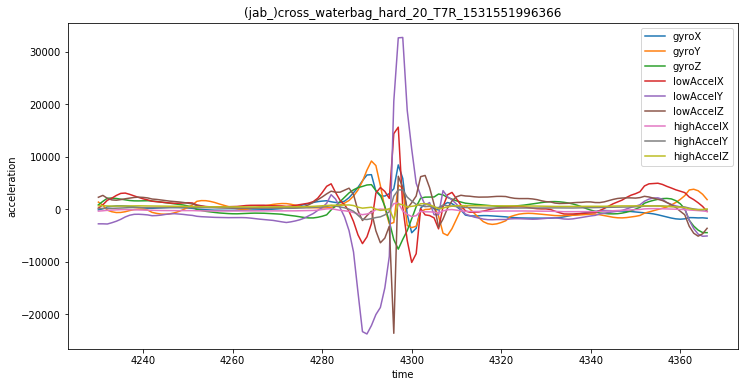

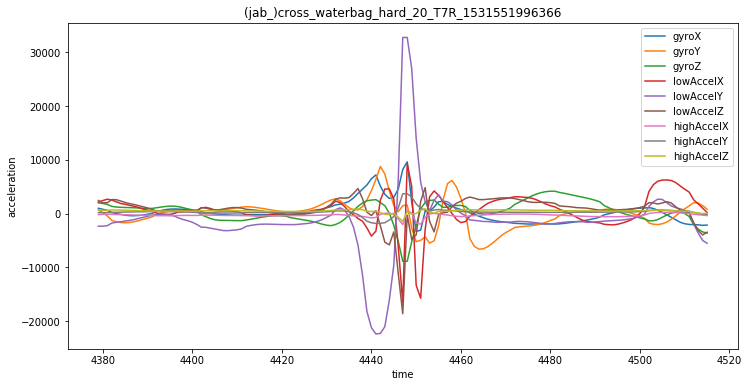

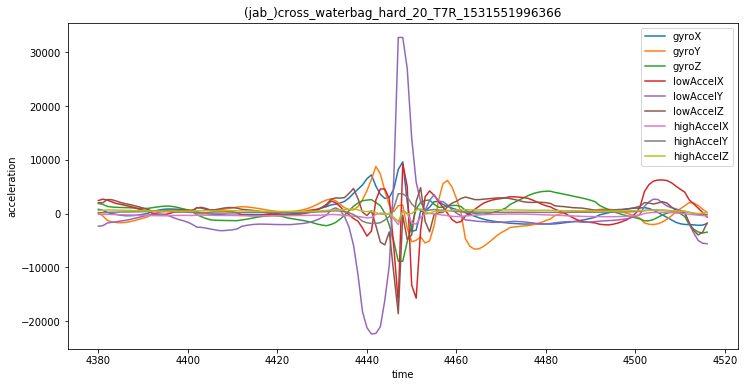

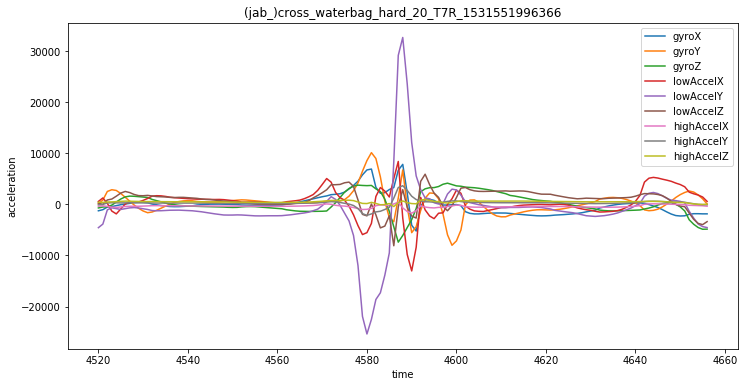

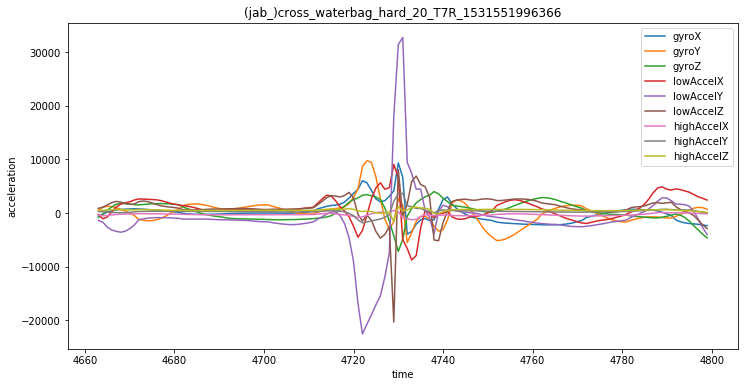

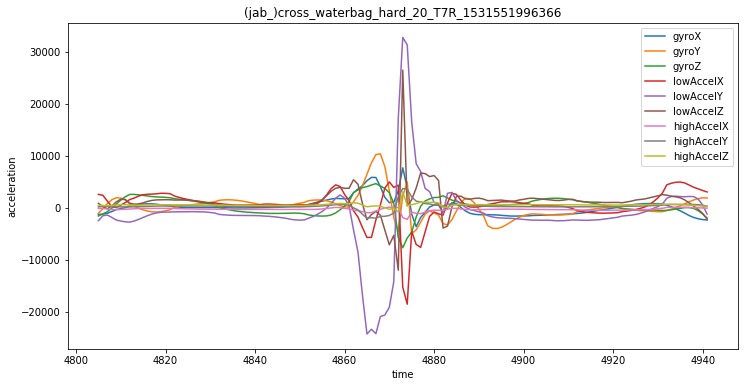

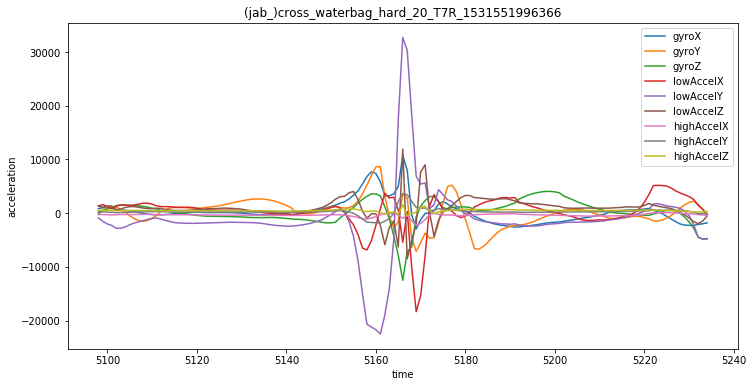

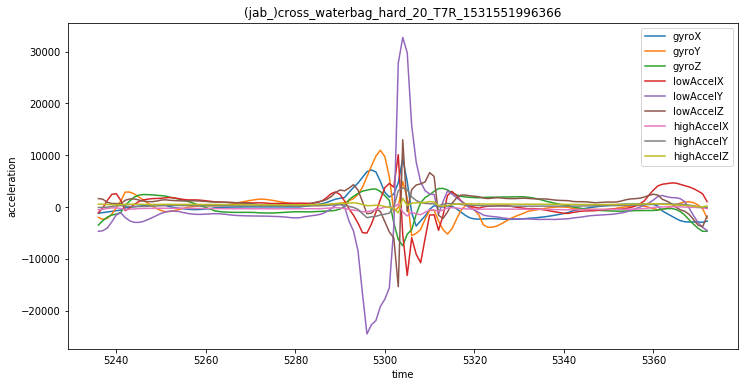

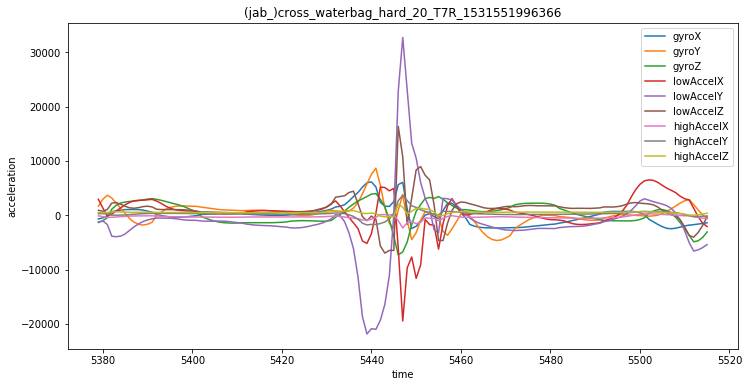

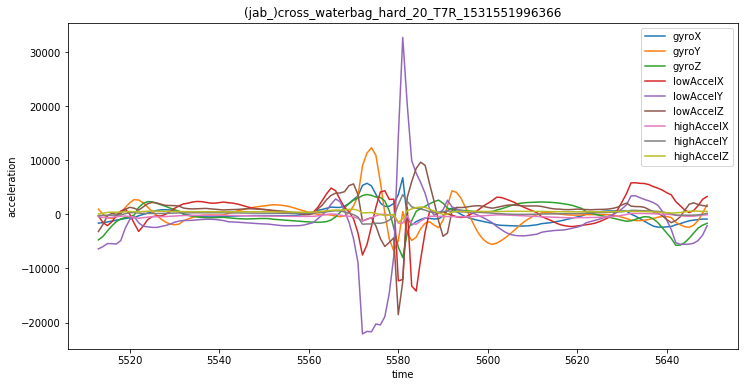

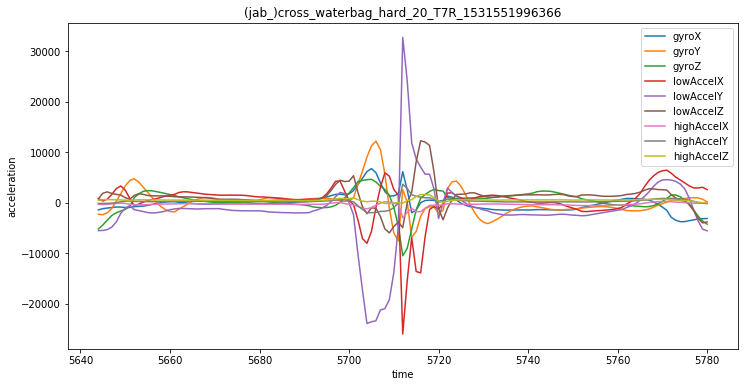

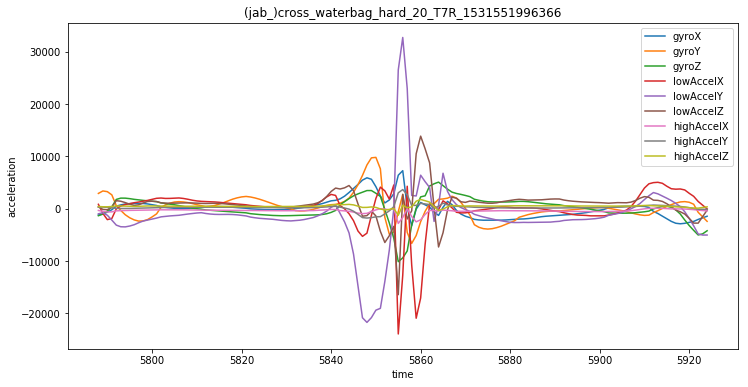

In [115]:
i=list_names.index('(jab_)cross_waterbag_hard_20_T7R_1531551996366')
start=waterbag_hard.index[0]
flat_waterbag_hard = pd.DataFrame(columns=col_names)
for j in maximums.index.values:
    waterbag_hard_1mvt=trackers.loc[trackers['exercise']==list_names[i],:].drop('exercise',axis=1)
    waterbag_hard_1mvt=waterbag_hard[j-margin-start:j+1+margin-start]
    a=pd.Series(waterbag_hard_1mvt.values.flatten())
    a=a.rename(index=lambda x:col_names[x]).T
    flat_waterbag_hard=flat_waterbag_hard.append(a,ignore_index=True)
    pre_visualize(trackers.loc[trackers['exercise']==list_names[i],:][j-margin-start:j+1+margin-start],list_names[i]) 

In [114]:
flat_waterbag_hard

,gyroX0,gyroY0,gyroZ0,lowAccelX0,lowAccelY0,lowAccelZ0,highAccelX0,highAccelY0,highAccelZ0,gyroX1,...,highAccelZ135,gyroX136,gyroY136,gyroZ136,lowAccelX136,lowAccelY136,lowAccelZ136,highAccelX136,highAccelY136,highAccelZ136
0,-264.0,1628.0,830.0,1448.0,-1298.0,1764.0,-256.0,271.0,576.0,-326.0,...,534.0,-1602.0,1872.0,376.0,3638.0,2256.0,832.0,-37.0,625.0,483.0
1,-1515.0,1968.0,-388.0,-1735.0,-494.0,738.0,-573.0,351.0,473.0,-1384.0,...,324.0,-2590.0,-882.0,-2667.0,2413.0,-1382.0,-1321.0,-159.0,262.0,268.0
2,-1252.0,2241.0,-689.0,1380.0,-981.0,518.0,-262.0,302.0,451.0,-907.0,...,467.0,-1190.0,292.0,-4222.0,1649.0,-1709.0,-511.0,-236.0,230.0,349.0
3,-1540.0,-520.0,-3665.0,-270.0,-5450.0,-1135.0,-427.0,-145.0,287.0,-1680.0,...,161.0,-1892.0,-285.0,-3575.0,-518.0,-5420.0,-1130.0,-451.0,-142.0,287.0
4,-1680.0,-290.0,-2870.0,-260.0,-5495.0,-995.0,-426.0,-149.0,301.0,-1745.0,...,287.0,-1535.0,-950.0,-2965.0,-1495.0,-5525.0,340.0,-549.0,-152.0,434.0
5,262.0,1582.0,1462.0,416.0,-964.0,2424.0,-359.0,304.0,642.0,470.0,...,414.0,-1705.0,2039.0,-398.0,2707.0,-238.0,-639.0,-130.0,377.0,337.0
6,-266.0,806.0,460.0,-584.0,-1534.0,1228.0,-458.0,247.0,522.0,100.0,...,254.0,-2666.0,-2456.0,-4240.0,524.0,-4450.0,-146.0,-348.0,-45.0,386.0
7,104.0,320.0,1710.0,1024.0,-3322.0,1014.0,-298.0,68.0,501.0,464.0,...,357.0,-1995.0,1802.0,-2644.0,2672.0,-242.0,-717.0,-133.0,376.0,329.0
8,-148.0,1340.0,812.0,186.0,-2806.0,2258.0,-382.0,120.0,625.0,64.0,...,-70.0,-1740.0,1813.0,-4490.0,-457.0,-5120.0,-3658.0,-445.0,-112.0,35.0
9,974.0,666.0,1982.0,2132.0,-2358.0,2416.0,-187.0,165.0,641.0,790.0,...,2.0,-2146.0,800.0,-3624.0,192.0,-5525.0,-3475.0,-381.0,-152.0,53.0
